<a href="https://colab.research.google.com/github/Alan240124/Alan/blob/main/Atividade_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import DataLoader, Dataset


In [2]:
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        # Retorna a amostra e o rótulo correspondente
        return self.dados[idx], self.labels[idx]

In [3]:
# Dados de exemplo
dados = torch.randn(100, 3)  # 100 amostras, 3 características cada
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

In [4]:
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [5]:
for dados, labels in dataloader:
    # Aqui você pode processar os dados, como treinar o modelo
    print(dados.shape, labels.shape)  # Exemplo: exibir o tamanho dos batches

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [14]:
import torch
from torch.utils.data import DataLoader, Dataset

# Definindo o Dataset personalizado
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        return self.dados[idx], self.labels[idx]

# Criando um dataset de exemplo
dados = torch.randn(100, 3)  # 100 amostras, cada uma com 3 características
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

# Criando o DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Iterando sobre o DataLoader
for dados, labels in dataloader:
    print(dados.shape, labels.shape)

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class HeartSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_names = sorted(os.listdir(image_dir))  # Listando nomes de arquivos

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega imagem e máscara usando os nomes de arquivos
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.image_names[idx].replace(".png", "_mask.png"))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplicando transformações
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Definindo transformações
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Tamanho padrão
    transforms.ToTensor()
])

# Criando o dataset
dataset = HeartSegmentationDataset(image_dir="/content/drive/MyDrive/DataSet_coracao/images", mask_dir="/content/drive/MyDrive/DataSet_coracao/masks", transform=transform)

In [15]:
batch_size = 10
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterando sobre o dataloader
for images, masks in dataloader:
    print(images.shape)  # Exemplo: tamanho do batch de imagens
    print(masks.shape)   # Exemplo: tamanho do batch de máscaras

torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])
torch.Size([10, 3])
torch.Size([10])


torch.Size([1, 256, 216])


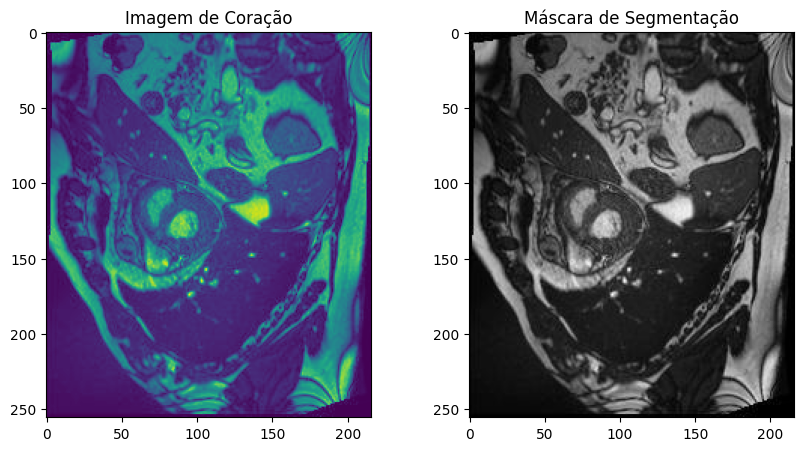

In [24]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# Carregando a imagem
image_path = '/content/drive/MyDrive/DataSet/images/image.0001.jpg'
image = Image.open(image_path)

# Convertendo a imagem para tensor
transform = transforms.ToTensor()
image_tensor = transform(image)

# Verificando a forma do tensor
print(image_tensor.shape)  # Deve ser [canais, altura, largura]

# Exibindo a imagem e a máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Garantindo que o tensor está em formato HWC para exibição
ax[0].imshow(image_tensor.permute(1, 2, 0).numpy())  # Convertendo para formato HWC
ax[0].set_title("Imagem de Coração")

# Carregando a máscara (ajuste o caminho conforme necessário)
mask_path = '/content/drive/MyDrive/DataSet/masks/image.0001.jpg'  # Substitua pelo caminho da sua máscara
mask = Image.open(mask_path).convert('L')  # Converte para escala de cinza
mask_tensor = transform(mask)  # Convertendo a máscara para tensor

# Exibindo a máscara em escala de cinza
ax[1].imshow(mask_tensor.squeeze(), cmap="gray")  # Exibindo a máscara
ax[1].set_title("Máscara de Segmentação")

plt.show()


Pastas 'images' e 'masks' verificadas/criadas com sucesso.


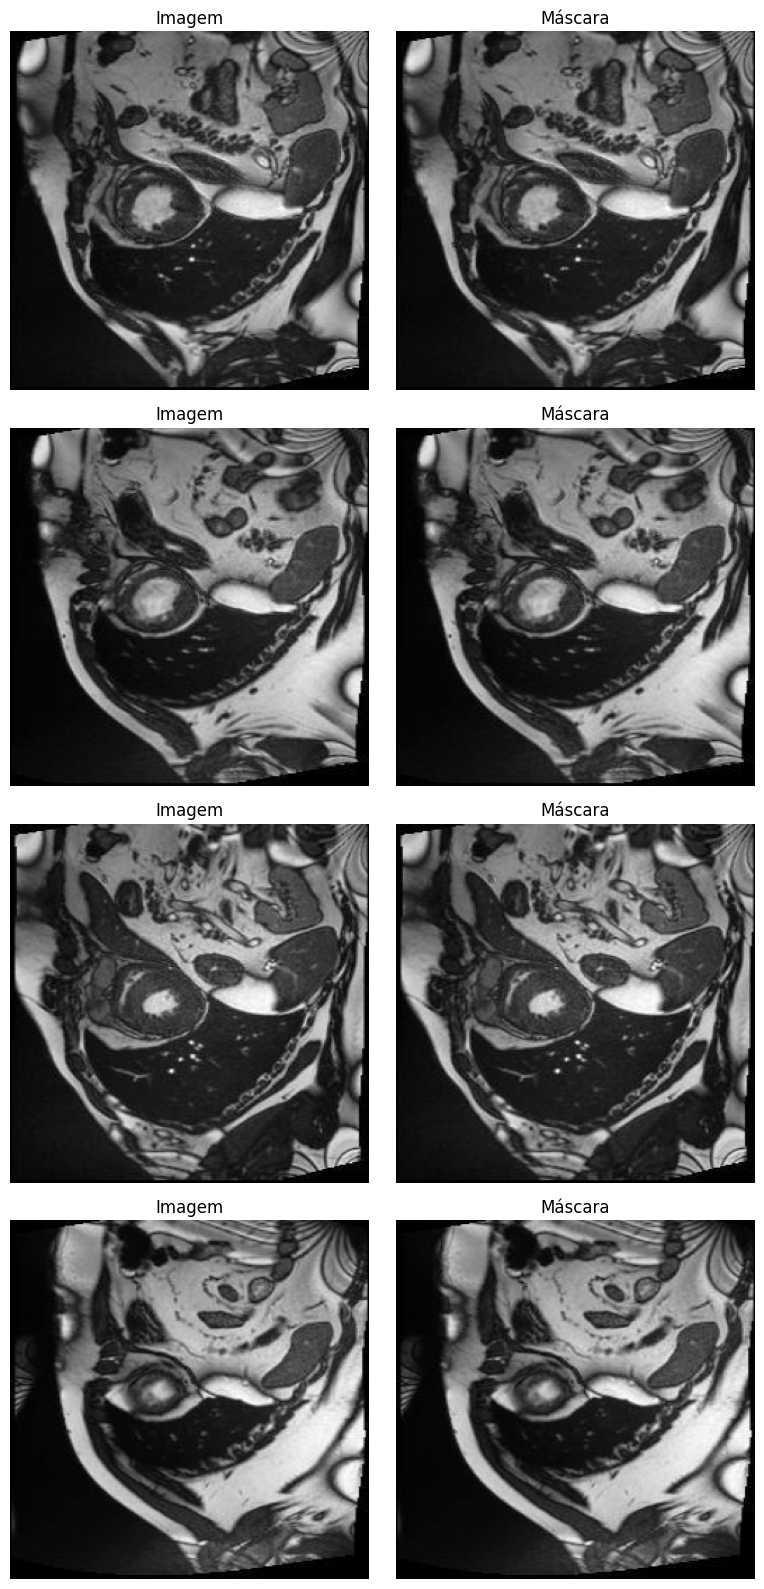

In [17]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Caminho base do dataset de segmentação do coração
dataset_path = "/content/drive/MyDrive/DataSet"

# Função para criar as pastas, caso não existam
def criar_pastas_dataset():
    os.makedirs(os.path.join(dataset_path, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, "masks"), exist_ok=True)
    print("Pastas 'images' e 'masks' verificadas/criadas com sucesso.")

# Chama a função para garantir que as pastas existam
criar_pastas_dataset()

# Define uma classe personalizada para o dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_names = os.listdir(images_dir)  # lista de imagens

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega a imagem e a máscara usando o índice
        image_path = os.path.join(self.images_dir, self.image_names[idx])
        mask_path = os.path.join(self.masks_dir, self.image_names[idx])

        # Abre as imagens como objetos PIL
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplica as transformações, se houver
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Define o caminho para as pastas de imagens e máscaras
images_dir = os.path.join(dataset_path, "images")
masks_dir = os.path.join(dataset_path, "masks")

# Transforma de exemplo (normalização e redimensionamento)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Cria o DataLoader
heart_dataset = HeartSegmentationDataset(images_dir=images_dir, masks_dir=masks_dir, transform=transform)
dataloader = DataLoader(heart_dataset, batch_size=4, shuffle=True)

# Função para exibir um batch de imagens e máscaras
def visualizar_batch(dataloader):
    images, masks = next(iter(dataloader))  # Obtem um batch
    batch_size = images.size(0)

    fig, axes = plt.subplots(batch_size, 2, figsize=(8, 4 * batch_size))
    for i in range(batch_size):
        # Converte a imagem e máscara para numpy para exibição
        image_np = images[i].permute(1, 2, 0).numpy()  # rearranja canais para [H, W, C]
        mask_np = masks[i].squeeze().numpy()           # remove dimensões extras

        # Exibe a imagem e a máscara
        axes[i, 0].imshow(image_np)
        axes[i, 0].set_title("Imagem")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(mask_np, cmap="gray")
        axes[i, 1].set_title("Máscara")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Chama a função para exibir um batch de imagens e máscaras
visualizar_batch(dataloader)